## Zadanie 1
Zapoznaj się z teorią algorytmu klastrowania K-means (klasyczny alogorytm w dziedzinie eksploracji danych (ang. <a href="https://en.wikipedia.org/wiki/Data_mining">data mining))</a>) np. przez stronę <a href="https://www.statystyka.eu/analiza-skupien/metoda-k-srednich.php">metoda-k-średnich</a>. Przestestuj jedną wybraną metrykę, inną  niż euklidesowa - wykonaj obrazy pokazujące efekty jej działania.

Do zwizualizowania działania klastrowania K-means potrzebne jest zdefiniowanie punktów reprezentujacych dane, punkty są tak losowane by widoczne było ich pogrupowane rozmieszczenie

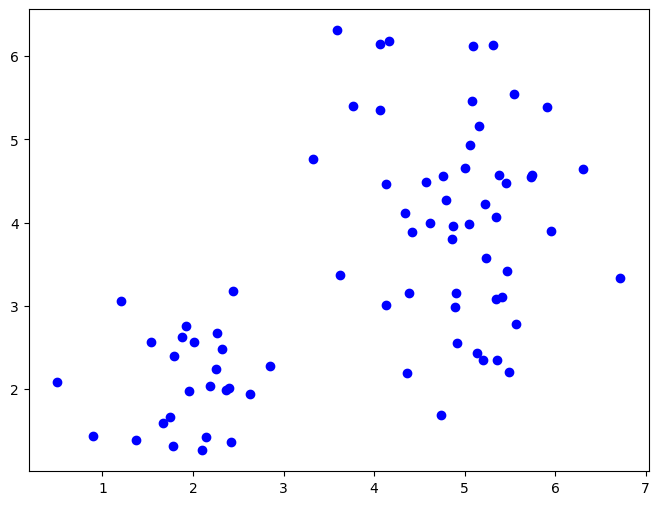

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Generowanie losowych punktów danych
np.random.seed(23)
data = np.vstack([
    np.random.normal(loc=(2, 2), scale=0.6, size=(25, 2)),
    np.random.normal(loc=(5, 3), scale=0.8, size=(25, 2)),
    np.random.normal(loc=(5, 5), scale=0.7, size=(25, 2))
])
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='b', label=f'dane')
plt.show()

Następnie trzeba zdefiniować centroidy od jakich zaczyna się algorytm klastrowania, wybieram 3 losowe punkty spośród danych:

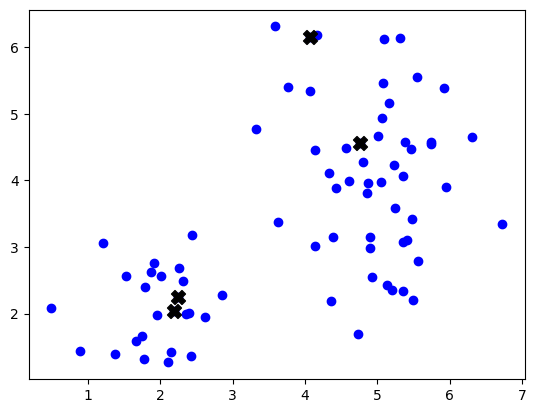

In [95]:
k = 4
startCentroids = data[np.random.choice(data.shape[0], k, replace=False)]

plt.scatter(data[:, 0], data[:, 1], c='b', label=f'dane')
plt.scatter(startCentroids[:, 0], startCentroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.show()

Mając wybrane centroidy należy zdefiniować funkcję odległości, zastosuję odległość Manhattan lub euklidesową

In [96]:
# Funkcja obliczająca odległość euklidesową
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Funkcja obliczająca odległość Manhattan
def manhattan_distance(point1, point2):
    return np.sum(np.abs((point1 - point2)))

# Funkcja obliczająca odległość euklidesową do kwadratu
def euclidean2_distance(point1, point2):
    return np.sum((point1 - point2) ** 2)

# Funkcja obliczająca odległość Minkowskiego dla m = 2
def minkowski_distance(point1, point2):
    m = 2
    return np.sum(np.abs(point1 - point2) ** m) ** (1/m)

Kolejnym etapem jest zdefiniowanie funkcji klastryzującej

In [97]:
# Funkcja algorytmu K-means
def k_means(data, k, distance, centroids, max_iters=100):
    
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        
        for point in data:
            distances = [distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i]
                                  for i, cluster in enumerate(clusters)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return clusters, centroids



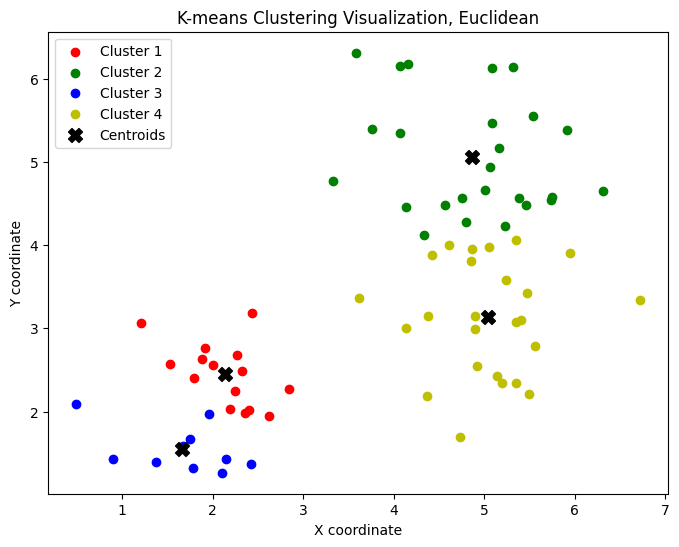

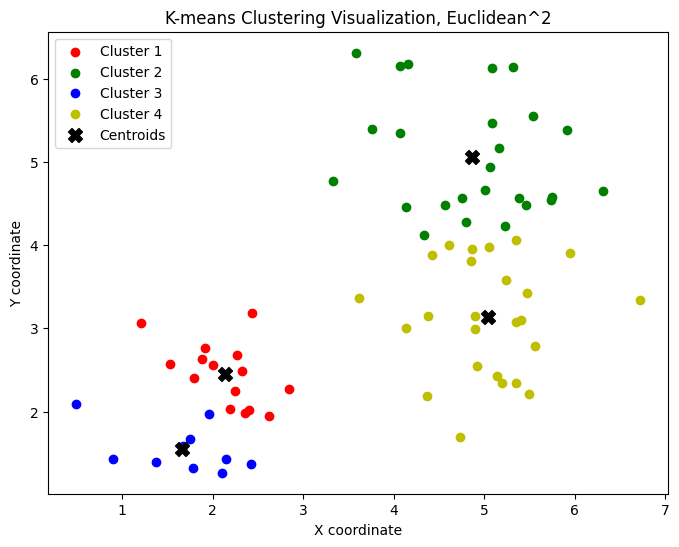

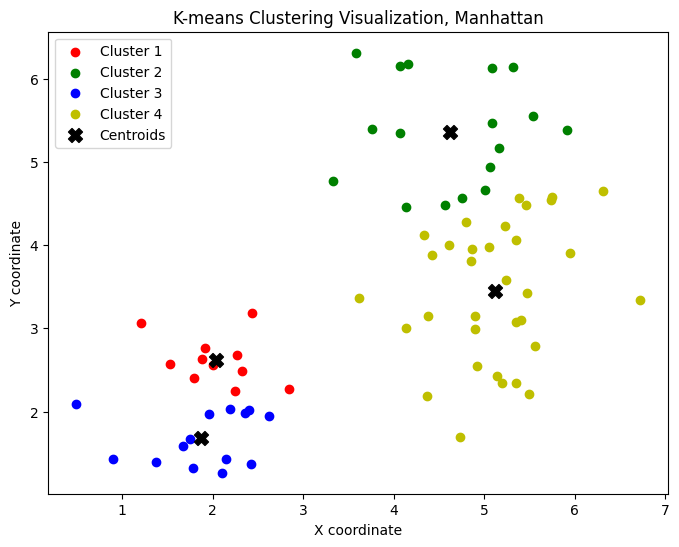

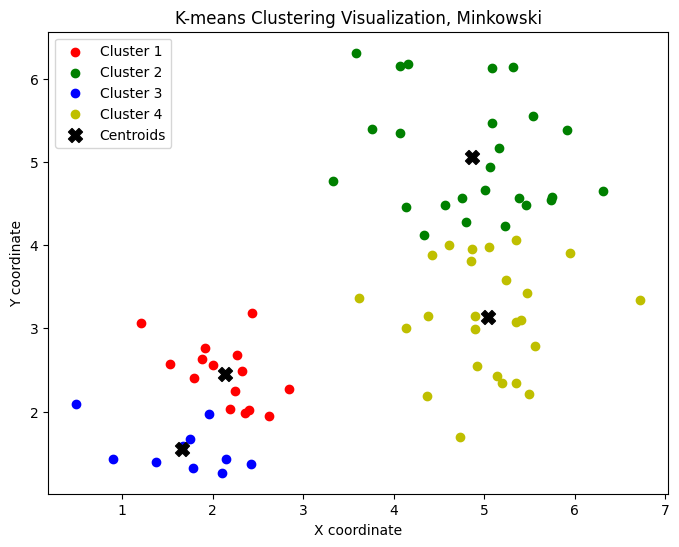

In [98]:

clusters, centroids = k_means(data, k, euclidean_distance, startCentroids)

# Wizualizacja
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-means Clustering Visualization, Euclidean")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


clusters, centroids = k_means(data, k, euclidean2_distance, startCentroids)

# Wizualizacja
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-means Clustering Visualization, Euclidean^2")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


clusters, centroids = k_means(data, k, manhattan_distance, startCentroids)

# Wizualizacja
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-means Clustering Visualization, Manhattan")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


clusters, centroids = k_means(data, k, minkowski_distance, startCentroids)

# Wizualizacja
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-means Clustering Visualization, Minkowski")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()
